In [1]:
from collections import Counter

import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## EDA

In [2]:
vacancies = pd.read_csv("/home/rinat/repos/itmo_mlsd_2024/notebooks/parsed_2024_12_28.csv", index_col=0)

In [3]:
def filter_skills_by_frequency(vacancies, min_count=25):
    """
    Функция фильтрует список ключевых навыков вакансий, оставляя только те, 
    которые встречаются более или равно заданному количеству раз.

    Parameters:
    vacancies (pandas.DataFrame): DataFrame с данными о вакансиях, включая столбец 'key_skills'.
    min_count (int): Минимальное количество появлений навыка, чтобы он остался в списке.

    Returns:
    pandas.DataFrame: Обновленный DataFrame с отфильтрованными ключевыми навыками.
    """
    
    key_skills_list = vacancies['key_skills'].dropna().tolist()

    all_skills = []
    for skills in key_skills_list:
        skills = skills.strip("{}")
        skills = skills.split(",")
        all_skills.extend(skills)

    skill_counts = Counter(all_skills)

    sorted_skill_counts = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)

    skills_to_keep = [skill for skill, count in sorted_skill_counts if count >= min_count]

    vacancies['key_skills'] = vacancies['key_skills'].apply(lambda x: ','.join([skill for skill in str(x).strip("{}").split(",") if skill in skills_to_keep]))

    return vacancies[vacancies['key_skills'] != ''].reset_index(drop=True)


In [4]:
vacancies = filter_skills_by_frequency(vacancies)

In [5]:
# Размер выборки данных
vacancies.shape

(50058, 9)

In [6]:
# Типы данных
vacancies.dtypes

name              object
description       object
employer_name     object
salary           float64
schedule          object
key_skills        object
experience        object
employment        object
region_name       object
dtype: object

In [7]:
# Пропусков в данных нет
vacancies.isnull().sum()

name             0
description      0
employer_name    0
salary           0
schedule         0
key_skills       0
experience       0
employment       0
region_name      0
dtype: int64

In [8]:
def get_unique_skills(vacancies, column_name='key_skills'):
    """
    Функция извлекает уникальные навыки из указанного столбца DataFrame, очищая и разделяя строки.
    Также удаляет пробелы в начале и в конце каждой строки.

    Parameters:
    vacancies (pandas.DataFrame): DataFrame с данными о вакансиях или навыках.
    column_name (str): Название столбца, содержащего информацию о навыках (по умолчанию 'key_skills').

    Returns:
    set: Очищенное множество уникальных навыков.
    """
    
    skills_set = set()
    for skills in vacancies[column_name]:
        if isinstance(skills, str):
            skills = skills.strip("{}").split(",")
            for skill in skills:
                cleaned_skill = skill.strip()
                if cleaned_skill:
                    skills_set.add(cleaned_skill)

    return skills_set

skills_set = get_unique_skills(vacancies)
total_skills = len(skills_set)
print("Всего уникальных навыков в датасете:", total_skills)

Всего уникальных навыков в датасете: 1398


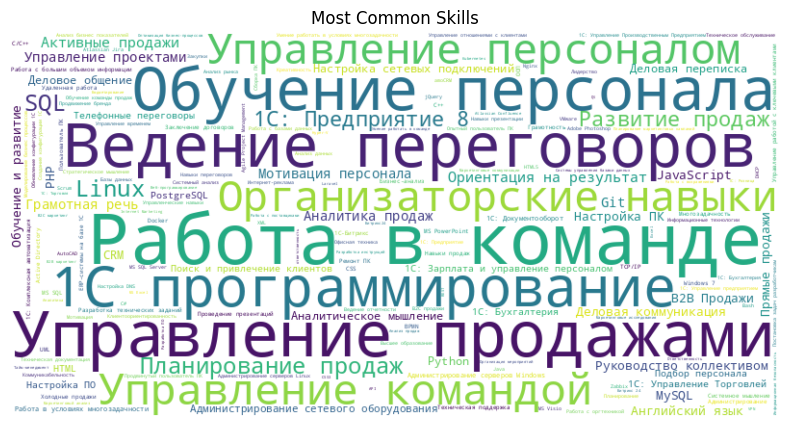

In [9]:
def get_skill_frequencies(vacancies, column_name='key_skills'):
    """
    Функция извлекает навыки из указанного столбца DataFrame, очищает их и подсчитывает частоту.
    Также удаляет пробелы в начале и в конце каждой строки и возвращает частоты.

    Parameters:
    vacancies (pandas.DataFrame): DataFrame с данными о вакансиях или навыках.
    column_name (str): Название столбца, содержащего информацию о навыках (по умолчанию 'key_skills').

    Returns:
    dict: Словарь с навыками и их частотами.
    """
    
    all_skills = []
    for skills in vacancies[column_name]:
        if isinstance(skills, str):
            skills = skills.strip("{}").split(",")
            for skill in skills:
                cleaned_skill = skill.strip()
                if cleaned_skill:
                    all_skills.append(cleaned_skill)

    skill_counts = Counter(all_skills)  # Подсчитываем частоту каждого навыка
    return skill_counts

# Получаем частоты навыков
skill_counts = get_skill_frequencies(vacancies)

# Создаем карту слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

# Отображаем карту слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title('Most Common Skills')
plt.show()


Можно заметить, что наиболее частыми навыками являются те, которые отражают работу с персоналом/в команде, продажи, язык программирования 1С

In [10]:
# Описательные статистики данных
vacancies.describe(include="all")

,name,description,employer_name,salary,schedule,key_skills,experience,employment,region_name
count,50058,50058,50058,5.005800e+04,50058,50058,50058,50058,50058
unique,14587,38167,16965,NaN,5,30327,4,4,12
top,Руководитель отдела продаж,Обязанности: Разрабатывать на платформе &quot...,Первый Бит,NaN,fullDay,1С программирование,between1And3,full,Москва
freq,4393,27,229,NaN,39637,206,24051,48374,26578
mean,NaN,NaN,NaN,1.289287e+05,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.559026e+05,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.000000e+04,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.150000e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.600000e+05,NaN,NaN,NaN,NaN,NaN


In [11]:
# Удаляем выбросы по зарплате
vacancies = vacancies.loc[vacancies['salary'] < 5000000].reset_index(drop=True)

In [18]:
vacancies.head()

,name,description,employer_name,salary,schedule,key_skills,experience,employment,region_name
0,PHP-разработчик (Middle),Дром даёт возможность вместе с сильной командо...,Дром,180000.0,fullDay,"PHP,ООП,Веб-программирование,MySQL",between3And6,full,Томская область
1,Руководитель отдела продаж (Дистрибьюция),Компания &quot;АКВАСТОК&quot; - отечественный ...,АКВАСТОК,240000.0,fullDay,"Активные продажи,Поиск и привлечение клиентов,...",between3And6,full,Москва
2,Ведущий инженер-программист,Приглашаем на работу ВЕДУЩЕГО ИНЖЕНЕРА-ПРОГРАМ...,"Энергокабель, Завод",146500.0,fullDay,"Python,MS SQL,SQL,MS Visual Studio,C/C++",between1And3,full,Московская область
3,Программист С#,COMITAS — первый системный интегратор междунар...,КОМИТАС,155000.0,fullDay,"АСУ ТП,C#,C++,Автоматизация,PostgreSQL",between1And3,full,Москва
4,Data Scientist,"Ищем специалиста по Data Science, чтобы строит...",Точка,380000.0,fullDay,"SQL,Python,Информационные технологии,Работа с ...",between3And6,full,Москва


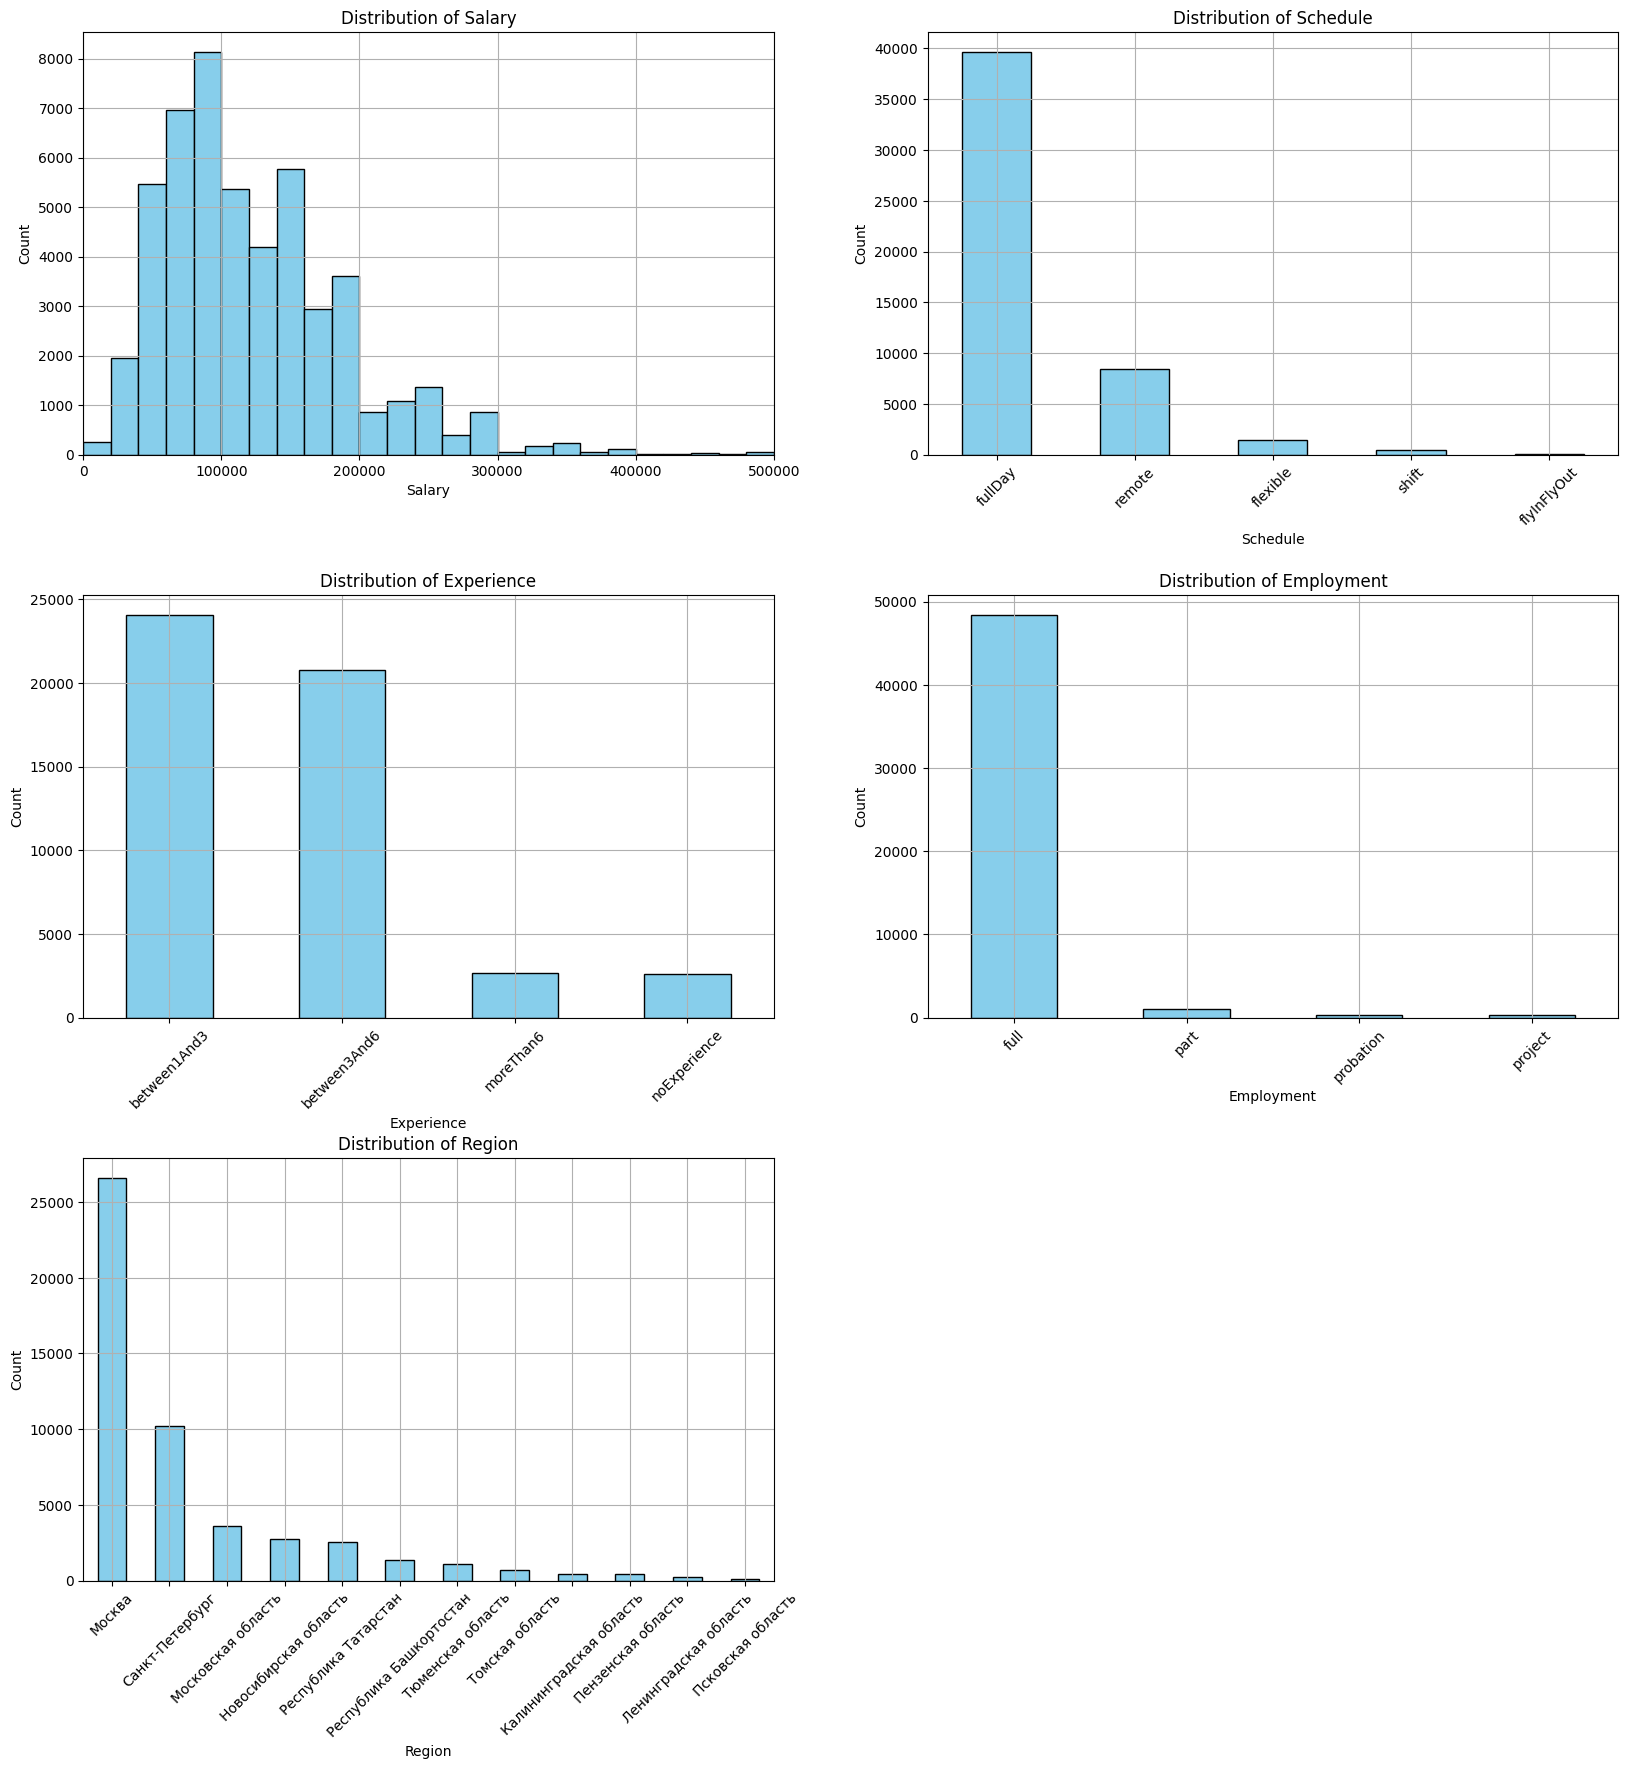

In [12]:
def plot_vacancies_distribution(vacancies):
    """
    Функция строит несколько графиков распределений для данных о вакансиях.
    Графики включают распределения по зарплатам, графикам работы, опыту, занятости и регионам.

    Parameters:
    vacancies (pandas.DataFrame): DataFrame с данными о вакансиях, включая столбцы 'salary', 
                                   'schedule', 'experience', 'employment', 'region_name'.
    """
    # Создаем фигуру с несколькими подграфиками (3 строки и 2 колонки)
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))  
    fig.tight_layout(pad=8.0)  # Устанавливаем отступы между графиками

    # 1. График распределения зарплаты
    axs[0, 0].hist(vacancies['salary'], bins=100, color='skyblue', edgecolor='black')
    axs[0, 0].set_xlabel('Salary')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].set_title('Distribution of Salary')
    axs[0, 0].grid(True)
    axs[0, 0].set_xlim(0, 500000)

    # 2. График распределения графика работы
    vacancies['schedule'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[0, 1])
    axs[0, 1].set_xlabel('Schedule')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_title('Distribution of Schedule')
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].grid(True)

    # 3. График распределения опыта работы
    vacancies['experience'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 0])
    axs[1, 0].set_xlabel('Experience')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].set_title('Distribution of Experience')
    axs[1, 0].tick_params(axis='x', rotation=45)
    axs[1, 0].grid(True)

    # 4. График распределения типа занятости
    vacancies['employment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 1])
    axs[1, 1].set_xlabel('Employment')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].set_title('Distribution of Employment')
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].grid(True)

    # 5. График распределения региона
    vacancies['region_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[2, 0])
    axs[2, 0].set_xlabel('Region')
    axs[2, 0].set_ylabel('Count')
    axs[2, 0].set_title('Distribution of Region')
    axs[2, 0].tick_params(axis='x', rotation=45)
    axs[2, 0].grid(True)

    # Если пустой подграфик остался, скрыть его
    axs[2, 1].axis('off')

    plt.show()

plot_vacancies_distribution(vacancies)


На графиках можно заметить распределение различных данных в датасете

1. По графику зарплаты можно сказать, что основная доля зарплат по вакансиям содержится между 50-200 тысячами рублей, а доля вакансий с зарплатами выше 300 тысяч всего 3% от всей выборки
2. По графику типа расписания тоже можно сделать вывод о том, что большая часть работы - полный день в офисе
3. Наиболее распространненный опыт это: от 1 до 3 лет, от 3 до 6 лет
4. Полный день - основной тип вакансий в выборке
5. Наибольшее количество вакансий в данных из Москвы и Санкт-Петербурга